In [1]:
import pandas as pd
from pandas_summary import DataFrameSummary
import numpy as np
from datetime import datetime

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
PATH_PROCESSED = 'processed/'
joined = pd.read_feather(PATH_PROCESSED + 'joined_train.fth')

In [4]:
joined

,user_id,movie_id,rating,timestamp,movie_title,release_date,video_release_date,imdb_url,unknown,action,...,mystery,romance,sci-fi,thriller,war,western,age,gender,occupation,zip_code
0,1,1,5,874965758,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,24,M,technician,85711
1,1,2,3,876893171,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,...,0,0,0,1,0,0,24,M,technician,85711
2,1,3,4,878542960,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,...,0,0,0,1,0,0,24,M,technician,85711
3,1,4,3,876893119,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,...,0,0,0,0,0,0,24,M,technician,85711
4,1,5,3,889751712,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,...,0,0,0,1,0,0,24,M,technician,85711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,943,1067,2,875501756,Bottle Rocket (1996),21-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Bottle%20Rock...,0,0,...,0,0,0,0,0,0,22,M,student,77841
79996,943,1074,4,888640250,Reality Bites (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Reality%20Bit...,0,0,...,0,0,0,0,0,0,22,M,student,77841
79997,943,1188,3,888640250,Young Guns II (1990),01-Jan-1990,NaN,http://us.imdb.com/M/title-exact?Young%20Guns%...,0,1,...,0,0,0,0,0,1,22,M,student,77841
79998,943,1228,3,888640275,Under Siege 2: Dark Territory (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Under%20Siege...,0,1,...,0,0,0,0,0,0,22,M,student,77841


# Conversiones

# Tal vez algunas más:
* Rango de edad
* timestamp - releaseDate


In [5]:
# Max timestamp = 893286638
print(max(joined.timestamp))
date_today=max(joined.timestamp)
timestamp_today = datetime.fromtimestamp(date_today)

893286638


In [6]:
class elapsed(object):
    def __init__(self, fld):
        self.fld = fld
        self.last = pd.to_datetime(np.nan)
        self.last_store = 0
        
    def get(self, row):
        if row.Store != self.last_store:
            self.last = pd.to_datetime(np.nan)
            self.last_store = row.Store
        if (row[self.fld]): self.last = row.Date
        return row.Date-self.last

In [7]:
def add_elapsed(df, fld, prefix):
    sh_el = elapsed(fld)
    df[prefix+fld] = df.apply(sh_el.get, axis=1)

In [8]:
joined['release_date']

0        01-Jan-1995
1        01-Jan-1995
2        01-Jan-1995
3        01-Jan-1995
4        01-Jan-1995
            ...     
79995    21-Feb-1996
79996    01-Jan-1994
79997    01-Jan-1990
79998    01-Jan-1995
79999    01-Jan-1994
Name: release_date, Length: 80000, dtype: object

In [9]:
joined['ReleaseYear'] = joined['release_date'].apply(lambda x: str(x)[7:] if len(str(x)[7:]) == 4 else '1950')
joined.loc[joined['ReleaseYear'].isna(), 'ReleaseYear'] = '1990'
#print(joined['ReleaseYear'].value_counts())
joined['ReleaseYear'] = joined['ReleaseYear'].astype(int) #.astype('Int64')

In [10]:
joined['ReleaseMonthYear'] = joined['release_date'].apply(lambda x: str(x)[3:])
joined['ReleaseMonthYear'].value_counts()

Jan-1995    7879
Jan-1994    7036
Jan-1997    6391
Jan-1993    5294
Dec-1996    2132
            ... 
Jun-1960       4
0              3
Sep-1994       2
Jan-1926       2
Apr-1986       1
Name: ReleaseMonthYear, Length: 109, dtype: int64

In [11]:
joined['ReleaseMonthYear'] = joined['release_date'].apply(lambda x: str(x)[3:] if len(str(x)) == 11 else 'Feb-1950')
joined['ReleaseMonthYear'].value_counts()

Jan-1995    7879
Jan-1994    7036
Jan-1997    6391
Jan-1993    5294
Dec-1996    2132
            ... 
Jun-1960       4
Feb-1950       3
Sep-1994       2
Jan-1926       2
Apr-1986       1
Name: ReleaseMonthYear, Length: 109, dtype: int64

In [12]:
joined['WatchedYear'] = joined['timestamp'].apply(lambda x: datetime.fromtimestamp(x).strftime("%Y"))
joined['WatchedMonthYear'] = joined['timestamp'].apply(lambda x: datetime.fromtimestamp(x).strftime("%b-%Y"))

joined['WatchedYear'].value_counts()

1997    42229
1998    37771
Name: WatchedYear, dtype: int64

In [13]:
joined["release_date"] = pd.to_datetime(joined['release_date'])

In [14]:
joined['watchReleaseDiff'] = joined.apply(lambda x: (datetime.fromtimestamp(x['timestamp']) - x['release_date']).days , axis=1)
joined['watchReleaseDiff']

#joined_test['watchReleaseDiff'] = joined_test.apply(lambda x: (datetime.fromtimestamp(x['timestamp']) - x['release date']).days , axis=1)
#joined_test['watchReleaseDiff']

0         995
1        1018
2        1037
3        1018
4        1166
         ... 
79995     585
79996    1519
79997    2980
79998    1154
79999    1519
Name: watchReleaseDiff, Length: 80000, dtype: int64

## Nuevas columnas suponiendo que se ve ahora

In [15]:
joined['watchNow-releaseDiff'] = joined.apply(lambda x: (timestamp_today - x['release_date']).days , axis=1)
#joined['watchNow-MonthYear'] = joined.apply(lambda x: (date_today - x['release_date']).days , axis=1)
#joined['watchNow-Year'] = joined.apply(lambda x: (date_today - x['release_date']).days , axis=1)


In [16]:
from matplotlib import pyplot as plt

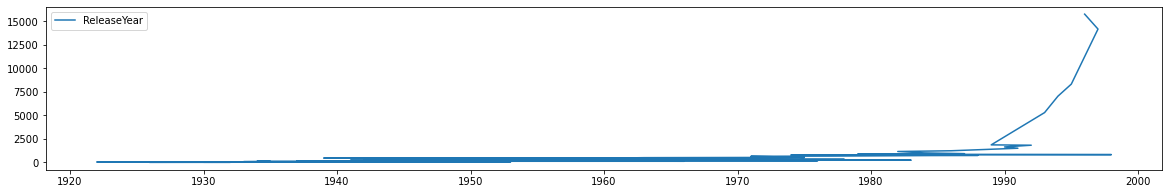

In [17]:
plt.figure(figsize=(20,3))
joined['ReleaseYear'].value_counts().plot()
plt.legend()
plt.show()

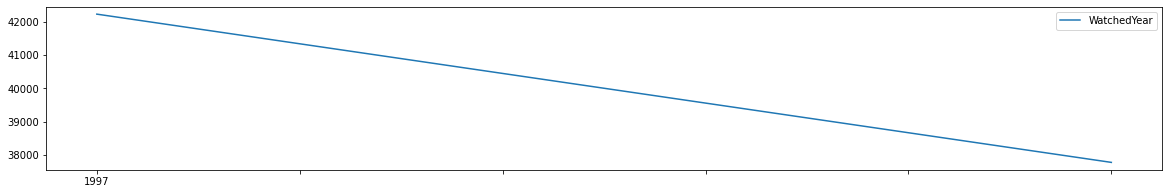

In [18]:
plt.figure(figsize=(20,3))
joined['WatchedYear'].value_counts().plot()
plt.legend()
plt.show()

In [19]:
def join_df(left, right, left_on, right_on=None):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", "_y"))

In [20]:
deleteColumns = ['imdb_url', 'video_release_date']
joined.drop(deleteColumns,1,inplace=True, errors='ignore')

In [21]:
bins = [0, 18, 30, 40, 50, 60, 70, 120]
labels = ['0-17','18-29', '30-39', '40-49', '50-59', '60-69', '70+']
joined['ageRange'] = pd.cut(joined.age, bins, labels = labels,include_lowest = True)

In [22]:
print(joined.shape)
print(joined.columns)
joined

(80000, 36)
Index(['user_id', 'movie_id', 'rating', 'timestamp', 'movie_title',
       'release_date', 'unknown', 'action', 'adventure', 'animation',
       'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
       'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi',
       'thriller', 'war', 'western', 'age', 'gender', 'occupation', 'zip_code',
       'ReleaseYear', 'ReleaseMonthYear', 'WatchedYear', 'WatchedMonthYear',
       'watchReleaseDiff', 'watchNow-releaseDiff', 'ageRange'],
      dtype='object')


,user_id,movie_id,rating,timestamp,movie_title,release_date,unknown,action,adventure,animation,...,gender,occupation,zip_code,ReleaseYear,ReleaseMonthYear,WatchedYear,WatchedMonthYear,watchReleaseDiff,watchNow-releaseDiff,ageRange
0,1,1,5,874965758,Toy Story (1995),1995-01-01,0,0,0,1,...,M,technician,85711,1995,Jan-1995,1997,Sep-1997,995,1207,18-29
1,1,2,3,876893171,GoldenEye (1995),1995-01-01,0,1,1,0,...,M,technician,85711,1995,Jan-1995,1997,Oct-1997,1018,1207,18-29
2,1,3,4,878542960,Four Rooms (1995),1995-01-01,0,0,0,0,...,M,technician,85711,1995,Jan-1995,1997,Nov-1997,1037,1207,18-29
3,1,4,3,876893119,Get Shorty (1995),1995-01-01,0,1,0,0,...,M,technician,85711,1995,Jan-1995,1997,Oct-1997,1018,1207,18-29
4,1,5,3,889751712,Copycat (1995),1995-01-01,0,0,0,0,...,M,technician,85711,1995,Jan-1995,1998,Mar-1998,1166,1207,18-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,943,1067,2,875501756,Bottle Rocket (1996),1996-02-21,0,0,0,0,...,M,student,77841,1996,Feb-1996,1997,Sep-1997,585,791,18-29
79996,943,1074,4,888640250,Reality Bites (1994),1994-01-01,0,0,0,0,...,M,student,77841,1994,Jan-1994,1998,Feb-1998,1519,1572,18-29
79997,943,1188,3,888640250,Young Guns II (1990),1990-01-01,0,1,0,0,...,M,student,77841,1990,Jan-1990,1998,Feb-1998,2980,3033,18-29
79998,943,1228,3,888640275,Under Siege 2: Dark Territory (1995),1995-01-01,0,1,0,0,...,M,student,77841,1995,Jan-1995,1998,Feb-1998,1154,1207,18-29


Scaling: ReleaseYear, Gender, Occupation, Age

# Normalizacion
['user_id', 'movie_id', 'rating', 'timestamp', 'movie_title',
       'release_date', 'unknown', 'action', 'adventure', 'animation',
       'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
       'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi',
       'thriller', 'war', 'western', 'age', 'gender', 'occupation', 'zip_code',
       'ReleaseYear', 'ReleaseMonthYear', 'WatchedYear', 'WatchedMonthYear',
       'watchReleaseDiff', 'ageRange'],

In [23]:
not_used = ['movie_title', 'release_date', 'age', 'zip_code']

In [24]:
cat_vars = ['gender', 'occupation', 'ageRange', 'ReleaseYear', 'ReleaseMonthYear', 'WatchedYear', 'WatchedMonthYear']

In [25]:
contin_vars = ['ReleaseYear', 'watchReleaseDiff', 'watchNow-releaseDiff', 'timestamp']

Normalización en continuas y LabelEncode en Categoricas

In [26]:
from sklearn_pandas import DataFrameMapper

In [27]:
cat_maps = [(o, LabelEncoder()) for o in cat_vars]
contin_maps = [([o], StandardScaler()) for o in contin_vars]

In [28]:
mapper_cat = DataFrameMapper(cat_maps)
_ = mapper_cat.fit(joined)

In [29]:
mapper_cont = DataFrameMapper(contin_maps)
_ = mapper_cont.fit(joined)

In [30]:
joined[cat_vars] = mapper_cat.transform(joined)

In [31]:
joined[contin_vars] = mapper_cont.transform(joined)

# Recuparar valores normalizados que usaremos como entradas

In [32]:
watchedMonthYear=str(timestamp_today.month) + '-' + str(timestamp_today.year)
print(watchedMonthYear)
watchedYear=timestamp_today.year
print(watchedYear)

4-1998
1998


In [33]:
print(contin_maps)
watchedYear_standardScaler = contin_maps[0][1]
#watchedYear_standardScaler.transform([watchedYear].reshape(-1,1))

[(['ReleaseYear'], StandardScaler()), (['watchReleaseDiff'], StandardScaler()), (['watchNow-releaseDiff'], StandardScaler()), (['timestamp'], StandardScaler())]


# All Done, saving

In [34]:
joined

,user_id,movie_id,rating,timestamp,movie_title,release_date,unknown,action,adventure,animation,...,gender,occupation,zip_code,ReleaseYear,ReleaseMonthYear,WatchedYear,WatchedMonthYear,watchReleaseDiff,watchNow-releaseDiff,ageRange
0,1,1,5,-1.616731,Toy Story (1995),1995-01-01,0,0,0,1,...,1,19,85711,-135.559629,82,0,7,-0.501916,-0.482847,1
1,1,2,3,-1.254339,GoldenEye (1995),1995-01-01,0,1,1,0,...,1,19,85711,-135.559629,82,0,6,-0.497500,-0.482847,1
2,1,3,4,-0.944145,Four Rooms (1995),1995-01-01,0,0,0,0,...,1,19,85711,-135.559629,82,0,5,-0.493852,-0.482847,1
3,1,4,3,-1.254348,Get Shorty (1995),1995-01-01,0,1,0,0,...,1,19,85711,-135.559629,82,0,6,-0.497500,-0.482847,1
4,1,5,3,1.163327,Copycat (1995),1995-01-01,0,0,0,0,...,1,19,85711,-135.559629,82,1,4,-0.469086,-0.482847,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,943,1067,2,-1.515953,Bottle Rocket (1996),1996-02-21,0,0,0,0,...,1,18,77841,-135.489061,12,0,7,-0.580632,-0.562727,1
79996,943,1074,4,0.954349,Reality Bites (1994),1994-01-01,0,0,0,0,...,1,18,77841,-135.630198,81,1,2,-0.401313,-0.412759,1
79997,943,1188,3,0.954349,Young Guns II (1990),1990-01-01,0,1,0,0,...,1,18,77841,-135.912472,77,1,2,-0.120815,-0.132217,1
79998,943,1228,3,0.954354,Under Siege 2: Dark Territory (1995),1995-01-01,0,1,0,0,...,1,18,77841,-135.559629,82,1,2,-0.471390,-0.482847,1


In [35]:
joined.to_feather(PATH_PROCESSED + 'joined.fth')

In [36]:
# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)	

date and time = 31/12/2022 09:43:19
